In [1]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(4)

%matplotlib inline

In [2]:
def circular_mean(X: np.ndarray, weights: np.ndarray = None) -> np.ndarray:
    """Compute circular mean for array X

    Args:
        X: values on [0, 1) of shape [N, D], N: no. of points, D: dimension
        weights: weight of each point

    Returns:
        X_mean: Circular mean of X
    """
    x_sin = np.sin(X * 2 * np.pi)
    x_cos = np.cos(X * 2 * np.pi)

    if weights is not None:
        x_sin_weight = x_sin * weights  # [:, None]
        x_cos_weight = x_cos * weights  # [:, None]
    else:
        x_sin_weight = x_sin
        x_cos_weight = x_cos

    x_sin_sum = x_sin_weight.sum(axis=(0))
    x_cos_sum = x_cos_weight.sum(axis=(0))

    X = (np.arctan2(-x_sin_sum, -x_cos_sum) + np.pi) / 2 / np.pi

    #     if map_to_origin:
    #         X = (X + 0.5 - 1e-12) % 1 - 0.5 + 1e-12

    return X

In [3]:
X = np.array([0.4, 0.6])
circular_mean(X)

0.5

In [4]:
# circular mean with weights
X = np.array([0.4, 0.6, 0.6])
circular_mean(X)

0.5378161734466756

In [5]:
X = np.array([0.4, 0.6])
weights = np.array([1, 2])
circular_mean(X, weights=weights)

0.5378161734466756

In [6]:
# setup:
# create 2D gaussian distribution in corner of box and wrap points into box

mean = [0.01, 0.1]
cov = 0.03 * np.eye(2)
x = np.random.multivariate_normal(mean, cov, 500)

## compute mean values:
# actual mean value from distribution before wrapping PBC
x_mean_actual = x.mean(axis=0)

# wrap to [0, 1)
x = x % 1

# naive mean
x_mean = x.mean(axis=0)
# circular mean
x_mean_circular = circular_mean(x)

(array([0.0253762 , 0.10247419]),
 array([0.4873762 , 0.36247419]),
 array([0.01799526, 0.10583097]),
 array([0.5, 0.5]))

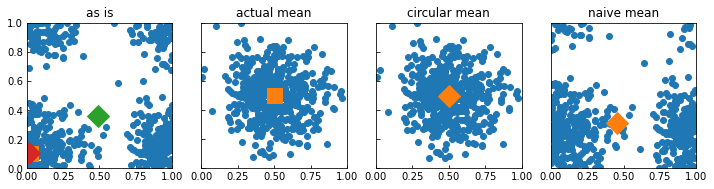

In [7]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, sharey=True, figsize=(12, 3))

kw = {"markersize": 15}

# plot as is
ax0.plot(*x.T, marker="o", lw=0)
ax0.plot(*x_mean_actual, marker="s", **kw)
ax0.plot(*(x_mean), marker="D", **kw)
ax0.plot(*x_mean_circular, marker="D", **kw)

# actual mean
x_shifted = x - x_mean_actual
x_shifted = (x_shifted + 0.5) % 1
x_mean_actual_shifted = x_shifted.mean(axis=0)

ax1.plot(*x_shifted.T, marker="o", lw=0)
ax1.plot(*x_mean_actual_shifted, marker="s", **kw)
# ax0.plot(*(x_mean), marker="D", **kw)
# ax0.plot(*x_mean_circular, marker="D", **kw)

# circular mean
x_shifted = x - x_mean_circular
x_shifted = (x_shifted + 0.5) % 1
x_mean_circular_shifted = circular_mean(x_shifted).T

ax2.plot(*(x_shifted).T, marker="o", linewidth=0)
ax2.plot(*x_mean_circular_shifted, marker="D", **kw)

# naive mean
x_shifted = x - x_mean
x_shifted = (x_shifted + 0.5) % 1
x_mean_shifted = x_shifted.mean(axis=0)

ax3.plot(*x_shifted.T, marker="o", linewidth=0)
ax3.plot(*x_mean_shifted, marker="D", **kw)


for ax in (ax0, ax1, ax2, ax3):
    ax.set_aspect(1)
    ax.set_box_aspect(1)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

ax0.set_title("as is")
ax1.set_title("actual mean")
ax2.set_title("circular mean")
ax3.set_title("naive mean")

x_mean_actual, x_mean, x_mean_circular, x_mean_circular_shifted

In [8]:
# what happens under continuous shifts? mean should be continous

In [9]:
# setup:
# create 2D gaussian distribution in corner of box and wrap points into box

mean = [0.01, 0.1]
cov = 5 * np.eye(2)
X = np.random.multivariate_normal(mean, cov, 500)

Xs = []
Xs_mean = []
Xs_mean_naive = []
Xs_mean_circular = []

for d in np.linspace(0, 0.2, 8):
    X = X + d
    Xs.append(X)
    Xs_mean.append(X.mean(axis=0))
    Xs_mean_naive.append((X % 1).mean(axis=0))
    Xs_mean_circular.append(circular_mean(X % 1))

Xs = np.array(Xs)
Xs_mean = np.array(Xs_mean)
Xs_mean_naive = np.array(Xs_mean_naive)
Xs_mean_circular = np.array(Xs_mean_circular)

Xs_mean - Xs_mean_circular, Xs_mean - Xs_mean_naive

(array([[-0.39820328,  0.10591092],
        [-0.39820328,  0.10591092],
        [-0.39820328,  0.10591092],
        [-0.39820328,  0.10591092],
        [-0.39820328,  0.10591092],
        [-0.39820328,  0.10591092],
        [-0.39820328,  0.10591092],
        [ 0.60179672,  0.10591092]]),
 array([[-0.534, -0.336],
        [-0.504, -0.314],
        [-0.444, -0.252],
        [-0.372, -0.144],
        [-0.266, -0.04 ],
        [-0.134,  0.094],
        [ 0.044,  0.244],
        [ 0.284,  0.454]]))

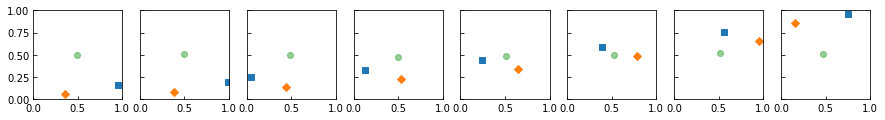

In [10]:
fig, axs = plt.subplots(ncols=len(Xs), sharey=True, figsize=(15, 5))

kw = {"lw": 0}
for ii, ax in enumerate(axs):
    ax.plot(*(Xs_mean % 1)[ii].T, marker="s", **kw)
    ax.plot(*Xs_mean_circular[ii].T, marker="D", **kw)
    ax.plot(*Xs_mean_naive[ii].T, marker="o", alpha=0.5, **kw)

    ax.set_aspect(1)
    ax.set_box_aspect(1)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)